# Regexes

In [ ]:
import re
import pandas as pd

Regexes are an important tool for handling text data that work by using special characters to represent patterns of characters within strings. You should be familiar with all of the symbols and character classes below:

![Regex Cheat Sheet](regex-cheat-sheet.jpg)

Because this was covered in lecture, we'll focus on a few important concepts about regexes can trip people up.

## Greedy vs. Non-Greedy Matching

One important thing that is not included in the graphic is the second meaning of the `?` character. `?` can also make any quantifier placed before it "non-greedy." By default, regex quantifiers (`*`, `+`, etc.) are greedy, meaning that they will take up as many characters as possible while still matching their pattern. Adding the `?` quantifier after another quantifier makes it non-greedy, so that it will take up as few characters as possible. Consider the following sentence:

```
Lisa, the neighborhood dog-walker, walks all the dogs whose owners don't walk them.
```

Now let's consider two regexes: `[A-Z].*,` and `[A-Z].*?,`. This regex will look for a capital letter (`[A-Z]`), any number of non-line break characters (`.*`), and a comma, in that order. The second one has the `?` quantifier after the `*` quantifier, so it will match non-greedily. Let's compare the greedy and non-greedy matches:

In [69]:
lisa = "Lisa, the neighborhood dog-walker, walks all the dogs whose owners don't walk them."

greedy_regex = r"[A-Z].*,"
nongreedy_regex = r"[A-Z].*?,"

print("Greedy regex match: ", re.search(greedy_regex, lisa)[0])
print("Non-greedy regex match: ", re.search(nongreedy_regex, lisa)[0])

Greedy regex match:  Lisa, the neighborhood dog-walker,
Non-greedy regex match:  Lisa,


Because of greedy matching, the first regex matched `Lisa, the neighborhood dog-walker,`, using as many characters as possible to still match the pattern. Because of the `?` quantifier, however, the second one matched only `Lisa,`. As you can see, we could still have matched more characters in the sentence, but the `?` quantifier forced our `*` quantifier to match non-greedily.

**Quick Check:** Which of the following regexes will match the shortest sequence of characters in the sentence below? (Note: In regexes, `^`, when not inside brackets, matches the start of a line and `$` the end of a line.)

```
"No," said Harvey, "we can't get them to stop. They won't listen to us for some reason."
```

1. `"[A-Z].*$`
2. `'\w+'`
3. `,.*?'`
4. `'.*$`

In [70]:
harvey = "\"No,\" said Harvey, \"we can't get them to stop. They won't listen to us for some reason.\""

r1 = r'"[A-Z].*$'
r2 = r"'.+'"
r3 = r",.*?'"
r4 = r"'.*$"

lengths = []
for r in [r1, r2, r3, r4]:
    match = re.search(r, harvey)
    print(f"{r} matched: {match[0]}")
    lengths += [len(match[0])]
    
print("\nRegex with shortest match: ", np.argmin(lengths) + 1)

"[A-Z].*$ matched: "No," said Harvey, "we can't get them to stop. They won't listen to us for some reason."
'.+' matched: 't get them to stop. They won'
,.*?' matched: ," said Harvey, "we can'
'.*$ matched: 't get them to stop. They won't listen to us for some reason."

Regex with shortest match:  3


## Escaping

An important concept in regexes is how to "escape" a character. Let's say that you want to match the `*` character literally in a string; the regex `*` won't work because the regex engine interprets `*` as a quantifier. For this reason, regexes provide an escape character, `\`, that, when placed before another special character in a regex, causes the pattern to match to that character literal rather than the pattern that it represents. To match the `*` character, we would use `\*`.

**Quick Check:** Which regex(es) below will match the `\` character?

1. `\\`
2. `\s`
3. `\w`
4. `\W`

In [71]:
for r in [r"\\", r"\s", r"\w", r"\W"]:
    if re.search(r, "\\"):
        print(r)

\\
\W


_Python note:_ Notice in the string in the `if` statement above, I needed to escape the `\`. This is because Python strings also use special characters and character classes (e.g. `\n`, `\t`) and so Python would have interpreted `"\"` as an unfinished string, because the `\"` is interpreted as the `"` character literal, rather than the boundary of a string. You can see this at work in the cell below:

In [72]:
# this will work
print("\"")

"


In [73]:
# this will error
print("\")

SyntaxError: EOL while scanning string literal (<ipython-input-73-84d07ffcecbf>, line 2)

# Worksheet: String, Group, Joining Operations in Pandas

We will continue discussion of [Pandas](https://pandas.pydata.org/). In this discussion, you will learn about:

* String operations
* Groupby 
* Joining DataFrames

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
from pathlib import Path
%matplotlib inline

import urllib.request
import os.path
import zipfile

# data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
# if not os.path.exists(local_filename): # if the data exists don't download again
#     with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
#         f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head(5)

State Sex  Year      Name  Count
0    CA   F  1910      Mary    295
1    CA   F  1910     Helen    239
2    CA   F  1910   Dorothy    220
3    CA   F  1910  Margaret    163
4    CA   F  1910   Frances    134

In [ ]:
elections = pd.read_csv("elections.csv")
elections.head(5)

### Question 1: Grouping Multiple Columns

Which of the following lines of code will output the following dataframe? Write your answer (hard-coded) as either 1, 2, 3, or 4. Recall that the arguments to `pd.pivot_table` are as follows: `data` is the input dataframe, `index` includes the values we use as rows, `columns` are the columns of the pivot table, `values` are the values in the pivot table, and `aggfunc` is the aggregation function that we use to aggregate `values`.

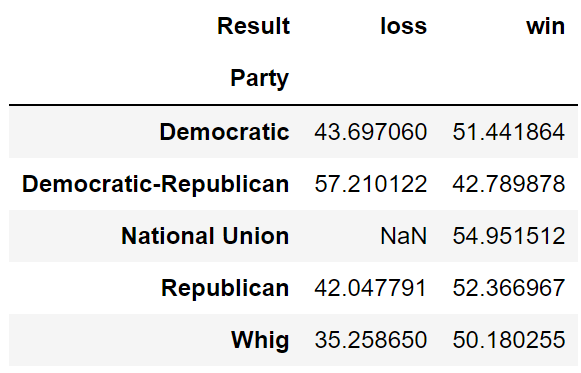

1) `pd.pivot_table(data=winners_only, index='Party', columns='Result', values='%', aggfunc=np.mean)`

2) `winners_only.groupby(['Party', 'Result'])['%'].mean()`

3) `pd.pivot_table(data=winners_only, index='Result', columns='Party', values='%', aggfunc=np.mean)`

4) `winners_only.groupby('%')[['Party', 'Result']].mean()`

**SOLUTION:**
1

### Question 1b

Consider the output of the `groupby.sum()` call below. Note that the resulting DataFrame is multi-indexed.

In [76]:
name_counts_since_1940 = babynames[babynames["Year"] >= 1940].groupby(["Name", "Year"]).sum()
name_counts_since_1940.head(9)

Count
Name  Year       
Aadan 2008      7
      2009      6
      2014      5
Aaden 2007     20
      2008    135
      2009    158
      2010     62
      2011     39
      2012     38

Multi-indexed DataFrames can be a little confusing at first, but the ideas for using loc generalize pretty naturally. Examples below:

In [77]:
name_counts_since_1940.loc['Aaiden':'Aakash'].T

Name  Aaiden                                    Aaira Aairah ...  Aakash       \
Year    2009 2010 2011 2013 2014 2015 2016 2017  2018   2017 ...    2004 2006   
Count     11   11    8   13   12   13   12   12     6      5 ...       8    5   

Name                                           
Year  2007 2008 2009 2010 2011 2012 2013 2014  
Count    7    5    8    6    8    8    6    8  

[1 rows x 30 columns]

In [78]:
#Use both indices
name_counts_since_1940.loc[("Aaiden", 2011):("Aakash", 2000)].T

Name  Aaiden                          Aaira Aairah Aakash                      \
Year    2011 2013 2014 2015 2016 2017  2018   2017   1991 1992 1994 1995 1997   
Count      8   13   12   13   12   12     6      5      5    9   10    6    5   

Name             
Year  1998 2000  
Count    8    6

Using `name_counts_since_1940`, set `imani_2013_count` equal to the number of babies born with the name 'Imani' in the year 2013. You may use either `.loc`. or `.query`. Make sure you're returning a value and not a Series or DataFrame

In [ ]:
imani_2013_count = ...

In [79]:
## Solution ##
imani_2013_count = name_counts_since_1940.loc[("Imani", 2013), 'Count']
imani_2013_count

47

Note: Sometimes it's just useful to throw away the index and go back to having arbitrary numbers as an index. To do this, we use `reset_index()`.

In [80]:
name_counts_since_1940_numerical_index = name_counts_since_1940.reset_index()
name_counts_since_1940_numerical_index.head(10)

Name  Year  Count
0  Aadan  2008      7
1  Aadan  2009      6
2  Aadan  2014      5
3  Aaden  2007     20
4  Aaden  2008    135
5  Aaden  2009    158
6  Aaden  2010     62
7  Aaden  2011     39
8  Aaden  2012     38
9  Aaden  2013     29

### Question 2: String Operations and Table Joining

Create a new DataFrame called `elections_with_first_name` with a new column `First Name` that is equal to the Candidate's first name.

Hint: Use `.str.split`.

In [ ]:
elections_with_first_name = ...

In [82]:
## Solution ##
elections_with_first_name = elections.copy()
elections_with_first_name["First Name"] = elections["Candidate"].str.split(" ").str[0]
elections_with_first_name

Year               Candidate                  Party  Popular vote Result  \
0    1824          Andrew Jackson  Democratic-Republican        151271   loss   
1    1824       John Quincy Adams  Democratic-Republican        113142    win   
2    1828          Andrew Jackson             Democratic        642806    win   
3    1828       John Quincy Adams    National Republican        500897   loss   
4    1832          Andrew Jackson             Democratic        702735    win   
5    1832              Henry Clay    National Republican        484205   loss   
6    1832            William Wirt           Anti-Masonic        100715   loss   
7    1836       Hugh Lawson White                   Whig        146109   loss   
8    1836        Martin Van Buren             Democratic        763291    win   
9    1836  William Henry Harrison                   Whig        550816   loss   
10   1840        Martin Van Buren             Democratic       1128854   loss   
11   1840  William Henry Harrison                   Whig       1275583    win   
12   1844              Henry Clay                   Whig       1300004   loss   
13   1844              James Polk             Democratic       1339570    win   
14   1848              Lewis Cass             Democratic       1223460   loss   
15   1848        Martin Van Buren              Free Soil        291501   loss   
16   1848          Zachary Taylor                   Whig       1360235    win   
17   1852         Franklin Pierce             Democratic       1605943    win   
18   1852            John P. Hale              Free Soil        155210   loss   
19   1852          Winfield Scott                   Whig       1386942   loss   
20   1856          James Buchanan             Democratic       1835140    win   
21   1856         John C. Frémont             Republican       1342345   loss   
22   1856        Millard Fillmore               American        873053   loss   
23   1860         Abraham Lincoln             Republican       1855993    win   
24   1860               John Bell   Constitutional Union        590901   loss   
25   1860    John C. Breckinridge    Southern Democratic        848019   loss   
26   1860      Stephen A. Douglas    Northern Democratic       1380202   loss   
27   1864         Abraham Lincoln         National Union       2211317    win   
28   1864     George B. McClellan             Democratic       1812807   loss   
29   1868         Horatio Seymour             Democratic       2708744   loss   
..    ...                     ...                    ...           ...    ...   
148  1996            John Hagelin            Natural Law        113670   loss   
149  1996             Ralph Nader                  Green        685297   loss   
150  1996              Ross Perot                 Reform       8085294   loss   
151  2000                 Al Gore             Democratic      50999897   loss   
152  2000          George W. Bush             Republican      50456002    win   
153  2000            Harry Browne            Libertarian        384431   loss   
154  2000            Pat Buchanan                 Reform        448895   loss   
155  2000             Ralph Nader                  Green       2882955   loss   
156  2004              David Cobb                  Green        119859   loss   
157  2004          George W. Bush             Republican      62040610    win   
158  2004              John Kerry             Democratic      59028444   loss   
159  2004        Michael Badnarik            Libertarian        397265   loss   
160  2004        Michael Peroutka           Constitution        143630   loss   
161  2004             Ralph Nader            Independent        465151   loss   
162  2008            Barack Obama             Democratic      69498516    win   
163  2008                Bob Barr            Libertarian        523715   loss   
164  2008           Chuck Baldwin           Constitution        199750   loss   
165  2008        Cynthia McKinney   

By default `pd.merge` will only join on values that are common to both of the tables we are merging (inner join). Below is an example of joining `elections_with_first_name` with `name_counts_since_1940_numerical_index` only on the first names.

In [83]:
elections_and_names_by_name = pd.merge(elections_with_first_name, name_counts_since_1940_numerical_index, left_on='First Name', right_on='Name')
elections_and_names_by_name.head(10)

Year_x       Candidate                  Party  Popular vote Result  \
0    1824  Andrew Jackson  Democratic-Republican        151271   loss   
1    1824  Andrew Jackson  Democratic-Republican        151271   loss   
2    1824  Andrew Jackson  Democratic-Republican        151271   loss   
3    1824  Andrew Jackson  Democratic-Republican        151271   loss   
4    1824  Andrew Jackson  Democratic-Republican        151271   loss   
5    1824  Andrew Jackson  Democratic-Republican        151271   loss   
6    1824  Andrew Jackson  Democratic-Republican        151271   loss   
7    1824  Andrew Jackson  Democratic-Republican        151271   loss   
8    1824  Andrew Jackson  Democratic-Republican        151271   loss   
9    1824  Andrew Jackson  Democratic-Republican        151271   loss   

           % First Name    Name  Year_y  Count  
0  57.210122     Andrew  Andrew    1940     87  
1  57.210122     Andrew  Andrew    1941    116  
2  57.210122     Andrew  Andrew    1942    139  
3  57.210122     Andrew  Andrew    1943    140  
4  57.210122     Andrew  Andrew    1944    155  
5  57.210122     Andrew  Andrew    1945    164  
6  57.210122     Andrew  Andrew    1946    236  
7  57.210122     Andrew  Andrew    1947    253  
8  57.210122     Andrew  Andrew    1948    266  
9  57.210122     Andrew  Andrew    1949    289

Now create `elections_and_names` by joining the `elections_with_first_name` table with `name_counts_since_1940_numerical_index` on both the first names of each person along and the year.

In [ ]:
elections_and_names = ...

In [85]:
## Solution ##
elections_and_names = pd.merge(elections_with_first_name, name_counts_since_1940_numerical_index, left_on=['First Name', 'Year'], right_on=['Name', 'Year'])
elections_and_names.head(10)

Year           Candidate        Party  Popular vote Result          %  \
0  1940  Franklin Roosevelt   Democratic      27313945    win  54.871202   
1  1940       Norman Thomas    Socialist        116599   loss   0.234237   
2  1940     Wendell Willkie   Republican      22347744   loss  44.894561   
3  1944  Franklin Roosevelt   Democratic      25612916    win  53.773801   
4  1944     Thomas E. Dewey   Republican      22017929   loss  46.226199   
5  1948    Claude A. Watson  Prohibition        103708   loss   0.212747   
6  1948        Harry Truman   Democratic      24179347    win  49.601536   
7  1948    Henry A. Wallace  Progressive       1157328   loss   2.374144   
8  1948       Norman Thomas    Socialist        139569   loss   0.286312   
9  1948     Thomas E. Dewey   Republican      21991292   loss  45.112958   

  First Name      Name  Count  
0   Franklin  Franklin     48  
1     Norman    Norman    259  
2    Wendell   Wendell     25  
3   Franklin  Franklin     54  
4     Thomas    Thomas   1562  
5     Claude    Claude     67  
6      Harry     Harry    293  
7      Henry     Henry    421  
8     Norman    Norman    247  
9     Thomas    Thomas   2332

Below we make a crude plot of election winners and losers. According to this plot, since the 1970s, we haven't had a president with a name that was highly common in the year he was elected. 

Note that our data is a bit messy since, for example, Bill Clinton's name in the data set is "Bill", when in fact his legal name is William.

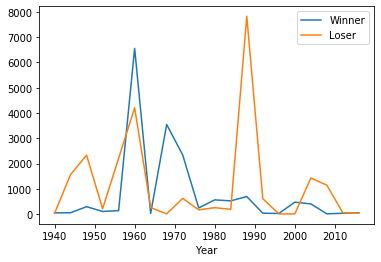

In [86]:
elections_and_names.query("Result == 'win'").set_index("Year")["Count"].plot()
elections_and_names.query("Result == 'loss'").sort_values("%").groupby("Year")['Count'].last().plot()
plt.legend(["Winner", "Loser"]);

# Regexes

In [87]:
class NotStringError(Exception):
    pass

def find_matches(text_list, regex):
    # This function finds the parts of each string in text_list which matches the regex
    if not isinstance(text_list, list):
        text_list = [text_list]
    
    for i, text in enumerate(text_list):
        if not isinstance(text, str):
             raise NotStringError(f'The {i}th item is not a string.')
    
    matches = [re.search(regex, text) for text in text_list]
        
    return [None if match is None else match for match in matches]

def get_indices(s, r):
    """Returns indices of match as CLOSED interval"""
    match = re.search(r, s)
    return None if match is None else [match.span()[0], match.span()[1]-1]

## Question 3
For each pattern specify the starting and ending position of the first match in the string. The index starts at zero and we are using closed intervals (both endpoints are included).

|    .      | abcdefg | abcs! | ab abc | abc, 123 |
|-----------|---------|-------|--------|----------|
| abc*      | [0,2]   |   .   |    .   |    .     |
| [^\s]+    |    .    |   .   |    .   |    .     |
| ab.* c    |    .    |   .   |    .   |    .     |
| [a-z1,9]+ |    .    |   .   |    .   |    .     |

Note: Try using the <https://regex101.com/> tool to understand more about regular expressions!

In [88]:
q3_strings = ['abcdefg', 'abcs!', 'ab abc', 'abc, 123']
q3_regexes = ['abc*', '[^\s]+', 'ab.*c', '[a-z1,9]+']

In [89]:
q3_data = [[get_indices(s, r) for s in q3_strings] for r in q3_regexes]
pd.DataFrame( 
    q3_data,
    columns = q3_strings,
    index = q3_regexes
)

abcdefg   abcs!  ab abc abc, 123
abc*       [0, 2]  [0, 2]  [0, 1]   [0, 2]
[^\s]+     [0, 6]  [0, 4]  [0, 1]   [0, 3]
ab.*c      [0, 2]  [0, 2]  [0, 5]   [0, 2]
[a-z1,9]+  [0, 6]  [0, 3]  [0, 1]   [0, 3]

## Question 4

Given the text in the cell below, 
    
Which of the following matches exactly to the email addresses (including angle brackets)?

In [91]:
q4_records = [
    '<record> Josh Hug <hug@cs.berkeley.edu> Faculty </record>',
    '<record> Manana Hakobyan <manana.hakobyan@berkeley.eud> TA </record>'
]
q4_regexes = [r'<.*@.*>', r'<[^<]*@[^>]*>', r'<.*@\w+\..*>']

In [92]:
[find_matches(q4_records, r) for r in q4_regexes]

[[<_sre.SRE_Match object; span=(0, 57), match='<record> Josh Hug <hug@cs.berkeley.edu> Faculty <>,
  <_sre.SRE_Match object; span=(0, 68), match='<record> Manana Hakobyan <manana.hakobyan@berkele>],
 [<_sre.SRE_Match object; span=(18, 39), match='<hug@cs.berkeley.edu>'>,
  <_sre.SRE_Match object; span=(25, 55), match='<manana.hakobyan@berkeley.eud>'>],
 [<_sre.SRE_Match object; span=(0, 57), match='<record> Josh Hug <hug@cs.berkeley.edu> Faculty <>,
  <_sre.SRE_Match object; span=(0, 68), match='<record> Manana Hakobyan <manana.hakobyan@berkele>]]

In [93]:
find_matches(q4_records, q4_regexes[1])

[<_sre.SRE_Match object; span=(18, 39), match='<hug@cs.berkeley.edu>'>,
 <_sre.SRE_Match object; span=(25, 55), match='<manana.hakobyan@berkeley.eud>'>]

## Question 5

Write a regular expression that matches strings that contain exactly 5 vowels.

Remember: 
- `^` matches the position at the beginning of a string (unless used for negation as in "[^]").
- `*` matches the preceding literal or sub-expression zero or more times.
- `[ ]` matches any one of the characters inside of the brackets.
- `{ }` indicates the {minimum, maximum} number of matches.
- `$` matches the position at the end of a string.



In [94]:
q5_regex = r'^([^aeiouAEIOU]*[aeiouAEIOU]){5}[^aeiouAEIOU]*$'
q5_string = ['fabulous', 'berkeley', 'go uc berkeley', 'GO UC Berkeley', 'vowels are fun', 'vowels are great']
find_matches(q5_string, q5_regex)

[None,
 None,
 <_sre.SRE_Match object; span=(0, 14), match='go uc berkeley'>,
 <_sre.SRE_Match object; span=(0, 14), match='GO UC Berkeley'>,
 <_sre.SRE_Match object; span=(0, 14), match='vowels are fun'>,
 None]

## Question 6

Given that `sometext` is a string, use `re.sub` to replace all clusters of non-vowel characters with a single period. For example `a big moon, between us...` would be changed to `a.i.oo.e.ee.u.`.

In [96]:
q6_string = "a big moon, between us..."
q6_regex = r"[^[^aeoiuAEIOU]+"
re.sub(q6_regex, ".", q6_string)

'a.i.oo.e.ee.u.'

## Question 7

Given the following text in variable `log`:

Fill in the regular expression in the variable `pattern` below so that after it executes, day is 26, month is Jan, and year is 2014.

In [97]:
log = '169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"'
pattern = r"\[(.+)\/(.+)\/([^:]+).*\]"
matches = re.findall(pattern, log)
day, month, year = matches[0]
[day, month, year]

['26', 'Jan', '2014']

## Question 8

Which strings contain a match for the following regular expression, "1+1$"?

Remember: "+" matches preceding literal or sub-expression *one* or more times and "$" matches the position at the end of a string.

In [ ]:
q8_texts = ['What is 1+1?', 'Make a wish at 11:11', '111 Ways to Succeed']
q8_regex = r'1+1$'
find_matches(q8_texts, q8_regex)

## Question 9

Write a regular expression that matches strings (including the empty strings) that only contain lowercase letters and numbers.

In [ ]:
q9_regex = '^[a-z0-9]*$'
q9_string = ['adsf04RTS!','asdfa342','RA43','adsfa!']
find_matches(q9_string, q9_regex)

## Question 10

Given that `address` is a string, use `re.sub` to replace all vowels with a lowercase letter "o". For example "123 Orange Street" would be changed to "123 orango Stroot".

In [ ]:
address = "123 Orange Street"
q10_regex = r"[aeiouAEIOU]"
re.sub(q10_regex, "o", address)

## Question 11

Given `sometext = "I've got 10 eggs, 20 gooses, and 30 giants."`, use `re.findall` to extract all the items and quantities from the string. The result should look like `['10 eggs', '20 gooses', '30 giants']`. You may assume that a space separates quantity and type, and that each item ends in s.

In [ ]:
q11_sometext = "I've got 10 eggs, 20 gooses, and 30 giants."
q11_regex = r"\d\d\s\w+s"
re.findall(q11_regex, q11_sometext)